# Problemas de Estadística Descriptiva


## Hacemos las importaciones necesarias
>A las que vienen por defecto le he añadido statistics como stats para poder hacer de manera más facil la obtención de los datos y math para calcular la raíz cuadrada al final del ejercicio 2

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import statistics as stats
import math


## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


## Cargamos dataset de IMDb

In [75]:
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


## Creamos una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
>Con apply de pandas le aplico la función len a todos los titulos para obtener su longitud y lo pongo como una nueva columna del DataFrame

In [76]:
df['title_length'] = df['title'].apply(len)
df

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


## Calculamos media, mediana y moda de la columna 'title_length'
>Con las funciones de statistics obtengo la media (mean), la mediana (median) y la moda (mode)

In [77]:
mean = stats.mean(df['title_length'])
median = stats.median(df['title_length'])
mode = stats.mode(df['title_length'])
resultados = {'Media:' : mean, 'Mediana:' : median, 'Moda:' : mode}
resultados

{'Media:': 15.481103166496425, 'Mediana:': 14, 'Moda:': 12}

## Calculamos el rango, la varianza y la desviación estándar de 'title_length'
>Con las funciones de statistics obtengo el rango (max() - min()), la varianza (variance) y la desviación estandar (stdev)

In [78]:
range_ = max(df['title_length']) - min(df['title_length'])
variance = stats.variance(df['title_length'])
std = stats.stdev(df['title_length'])
results = {'Rango:' : range_, 'Varianza:' : variance, 'Desviación Estandar:' : std}
results

{'Rango:': 67,
 'Varianza:': 72.10674888402882,
 'Desviación Estandar:': 8.49156928276681}

## Calcula asimetría y curtosis de la columna 'title_length'
>Con las funciones de statistics obtengo la asimetría (skew) y la curtosis (kurtosis) y los pongo como floats de python para que quede más limpio al imprimirse

In [79]:
asimetria = float(skew(df['title_length']))
curtosis = float(kurtosis(df['title_length']))
posicion = {'Asimetría:' : asimetria, 'Curtosis:' : curtosis}
posicion

{'Asimetría:': 1.5229143965677572, 'Curtosis:': 3.7867237597626007}

## Imprimimos el título más corto y el título más largo según su longitud
>Utilizando .loc y idmax/idmin obtengo el titulo más largo y el más corto y los imprimo

In [80]:
largo = df.loc[df['title_length'].idxmax(), 'title']
corto = df.loc[df['title_length'].idxmin(), 'title']
titulos = {'El título más largo es:' : largo, 'El título más corto es:' : corto}
titulos

{'El título más largo es:': 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb',
 'El título más corto es:': 'M'}

## graficamos los resultados de la columna 'title_length'
>Utilizamos un histograma de matplotlib para representar graficamente los tamaños de los titulos 

<function matplotlib.pyplot.show(close=None, block=None)>

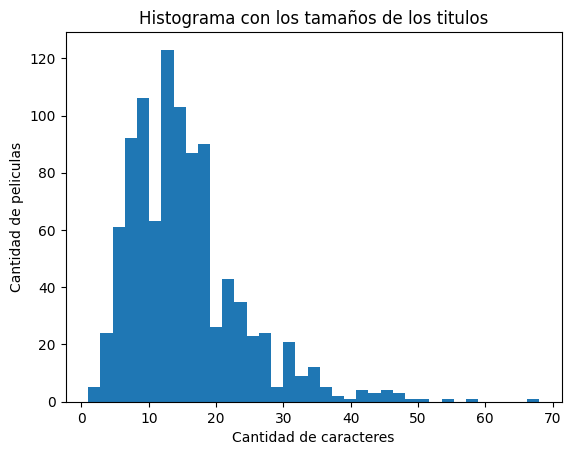

In [81]:
plt.hist(df['title_length'], bins = 'fd')
plt.title('Histograma con los tamaños de los titulos')
plt.xlabel('Cantidad de caracteres')
plt.ylabel('Cantidad de peliculas')
plt.show

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


### Creamos una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
>Utilizamos la función head para que automaticamente me escoja los 5 primeros elementos de tittle_length y lo convertimos en una lista con list()

In [82]:
lista = list(df['title_length'].head())
lista

[24, 13, 22, 15, 12]

### Calculamos la media de los 5 valores
>Como se nos pide inicialmente en el ejercicio que sea de manera manual obtenemos la media sumando los 5 elementos seleccionados anteriormente de 'title_length' y los dividimos entre el tamaño de la lista que los contenía.

In [83]:
media = sum(lista)/len(lista)
media

17.2

### Calculamos las diferencias al cuadrado con respecto a la media
>Como para mostrarlo por pantalla voy a usar un diccionario lo inicializo vacío al principio, después hago un bucle que pase por todos los elementos de la lista del apartado anterior y asigne su clave como cuadrado con su numero de posición y valor la diferencia entre la media y el valor de la lista elevada al cuadrado.

In [84]:
cuadrados = dict()
for i in range(len(lista)):
    cuadrados[f'cuadrado_{i}'] = (media - lista[i])**2
cuadrados


{'cuadrado_0': 46.24000000000001,
 'cuadrado_1': 17.639999999999993,
 'cuadrado_2': 23.040000000000006,
 'cuadrado_3': 4.839999999999997,
 'cuadrado_4': 27.039999999999992}

### Calculamos la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
>Calculamos el promedio de los cuadrados obtenidos en el apartado anterior con la suma (sum) de los valores (values) del diccionario creado para mostrar la solución y dividimos entre su tamaño. despues utilizamos la raíz cuadrada de la librería math (sqrt) para obtener la desviación estandar.

In [85]:
promedio = sum(cuadrados.values())/len(cuadrados)
desviacion = math.sqrt(promedio)
desviacion

4.874423042781577